In [2]:
from ast import Lambda
import tensorflow as tf
import json

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [81]:
dataset_path = r"D:\ObjectDetection\datasets\COCO-2017\val2017"

In [8]:
# 350, 300
wt1 = 350 
ht1 = 231

In [9]:
wo1 = 640
ho1 = 426

In [14]:
ar1 = wo1/ho1
ar1

1.5023474178403755

In [17]:
350/ar1

232.96875

In [7]:
wt2 = 276
ht2 = 300

In [6]:
wo2 = 586
ho2 = 640

In [13]:
ar2 = wo2/ho2
ar2

0.915625

In [19]:
300*ar2

274.6875

In [24]:
x = tf.random.uniform((426, 640, 3))
tf.shape(x)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([426, 640,   3])>

In [28]:
target_size = tf.constant([300, 350])
ar = tf.shape(x)[1]/tf.shape(x)[0]
if tf.argmax(tf.shape()[:-1]) == tf.argmax(target_size):
    y_scale = tf.constant([target_size])

TypeError: Missing required positional argument

In [29]:
[300, 350][tf.argmax([300, 350])]

350

In [30]:
tf.constant([300, 350])

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([300, 350])>

In [23]:
tf.argmax([640, 586, 3])== tf.argmax([300, 350])

<tf.Tensor: shape=(), dtype=bool, numpy=False>

In [35]:
v = tf.Variable((1, 1), dtype=tf.float32)
v

<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([1., 1.], dtype=float32)>

In [39]:
v.assign = (2, 2)
v

<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([1., 1.], dtype=float32)>

In [51]:
rescale = tf.zeros(2, dtype=tf.float32)
rescale

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0., 0.], dtype=float32)>

In [52]:
tf.tensor_scatter_nd_update(rescale, [[0], [1]], [200, 2500])

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 200., 2500.], dtype=float32)>

In [53]:
v.dtype

tf.float32

In [99]:
x = cv2.imread(os.path.join(dataset_path, "000000000285.jpg"))

In [100]:
resize_dims = (350, 300)
x = tf.cast(x, dtype=tf.float32)
y = [[1.43, 68.81, 584.57, 563.94, 1]]

In [101]:
target_size = tf.constant(resize_dims)
target_size = tf.reverse(target_size, axis=(-1,))
ar = tf.cast(tf.shape(x)[1]/tf.shape(x)[0], dtype=tf.float32)

tf.print(tf.shape(x)[:-1])

scale = tf.zeros(2, dtype=tf.float32)
max = tf.cast(target_size[tf.argmax(target_size)], dtype=tf.float32) 
min = tf.cast(target_size[tf.argmin(target_size)], dtype=tf.float32) 
if tf.argmax(tf.shape(x)[:-1]) == tf.argmax(target_size):
    indexes = [[tf.argmax(target_size)], [tf.argmin(target_size)]]
    updates = [max, max / ar]
else:
    indexes = [[tf.argmin(target_size)], [tf.argmax(target_size)]]
    updates = [min, min * ar]
scale = tf.tensor_scatter_nd_update(scale, indexes, updates)

x = tf.image.resize_with_pad(x, target_size[0], target_size[1])
x = tf.divide(x, 255)

# original bouding box shape is [ymin, xmin, width, height]
boxes, classes = tf.split(y, (4, 1), axis=-1)
boxes = tf.multiply(boxes, (scale[1], scale[0], scale[1], scale[0]))
y = tf.concat([boxes, classes], axis=-1)

paddings = [[0, 50 - tf.shape(y)[0]], [0, 0]]
y = tf.pad(y, paddings)

[640 586 3]


In [102]:
target_size

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([300, 350])>

In [103]:
tf.argmax(tf.shape(x)[:-1]) == tf.argmax(target_size)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [73]:
scale

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([382.25256, 350.     ], dtype=float32)>

In [74]:
ar

<tf.Tensor: shape=(), dtype=float32, numpy=0.915625>

In [75]:
max

<tf.Tensor: shape=(), dtype=float32, numpy=350.0>

In [76]:
min

<tf.Tensor: shape=(), dtype=float32, numpy=300.0>

In [104]:
updates

[<tf.Tensor: shape=(), dtype=float32, numpy=300.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=274.6875>]

In [105]:
scale

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([300.    , 274.6875], dtype=float32)>

In [78]:
tf.argmax(tf.shape(x)[:-1]) == tf.argmax(target_size)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [70]:
350/300

1.1666666666666667

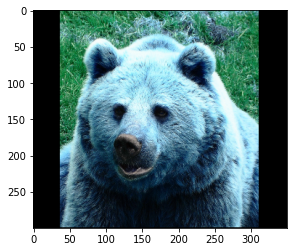

In [89]:
plt.imshow(x)